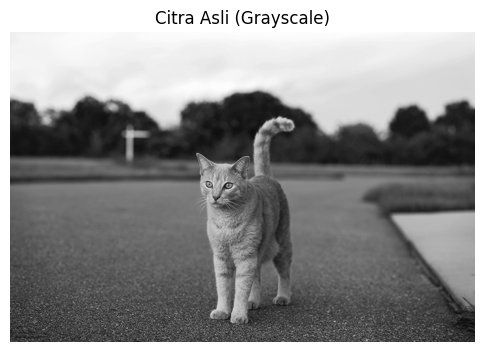

In [1]:
# 2002331207_Rhizieq Reflian Al Farouqh
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 2002331207_Rhizieq Reflian Al Farouqh
# Membaca gambar dan mengubahnya ke mode grayscale
try:
    img = cv2.imread('Cat.png')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
except:
    # Fallback jika gambar tidak ditemukan
    img_gray = np.zeros((200, 200), dtype=np.uint8)
    cv2.putText(img_gray, 'Gambar tidak ada', (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)


# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan citra grayscale
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.axis('off')
plt.show()


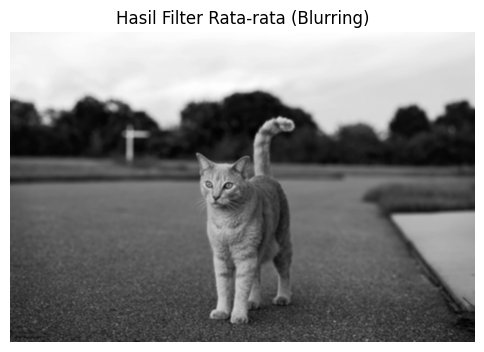

In [2]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Membuat kernel 3x3 untuk filter rata-rata
kernel_avg = np.ones((3, 3), np.float32) / 9

# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan filter menggunakan cv2.filter2D
output_avg = cv2.filter2D(img_gray, -1, kernel_avg)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(output_avg, cmap='gray')
plt.title('Hasil Filter Rata-rata (Blurring)')
plt.axis('off')
plt.show()


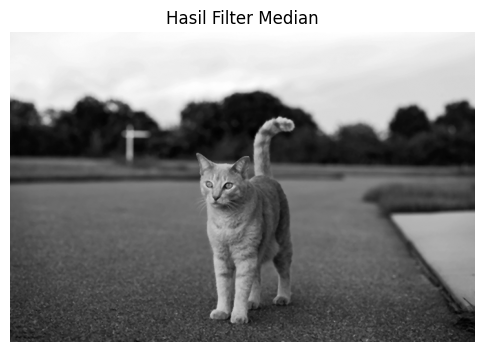

In [3]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan filter median dengan ukuran kernel 3x3
output_median = cv2.medianBlur(img_gray, 3)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(output_median, cmap='gray')
plt.title('Hasil Filter Median')
plt.axis('off')
plt.show()


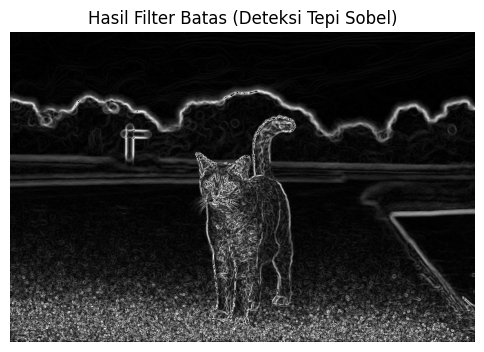

In [4]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan filter Sobel pada sumbu X dan Y
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menggabungkan hasil gradien dari kedua sumbu
output_batas = np.sqrt(sobel_x**2 + sobel_y**2)
output_batas = np.uint8(output_batas)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(output_batas, cmap='gray')
plt.title('Hasil Filter Batas (Deteksi Tepi Sobel)')
plt.axis('off')
plt.show()

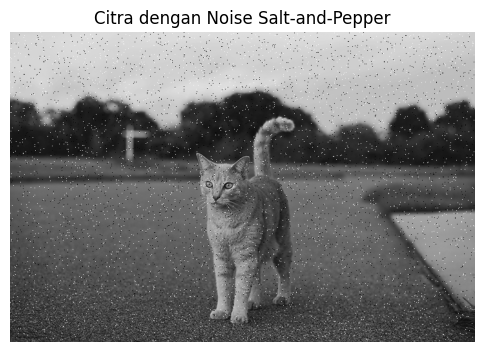

In [5]:
# 2002331207_Rhizieq Reflian Al Farouqh
def add_salt_pepper_noise(image, amount):
    output = np.copy(image)
    # Menambahkan Salt (putih)
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    output[tuple(coords)] = 255
    # Menambahkan Pepper (hitam)
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    output[tuple(coords)] = 0
    return output

# 2002331207_Rhizieq Reflian Al Farouqh
# Menambahkan noise S&P sebanyak 2%
noise_snp = add_salt_pepper_noise(img_gray, 0.02)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(noise_snp, cmap='gray')
plt.title('Citra dengan Noise Salt-and-Pepper')
plt.axis('off')
plt.show()


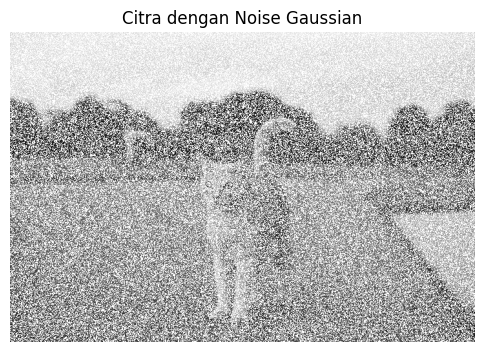

In [6]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Membuat noise Gaussian
mean = 0
var = 100
sigma = var**0.5
gaussian = np.random.normal(mean, sigma, img_gray.shape).astype('uint8')

# 2002331207_Rhizieq Reflian Al Farouqh
# Menambahkan noise ke citra
noise_gaussian = cv2.add(img_gray, gaussian)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(noise_gaussian, cmap='gray')
plt.title('Citra dengan Noise Gaussian')
plt.axis('off')
plt.show()

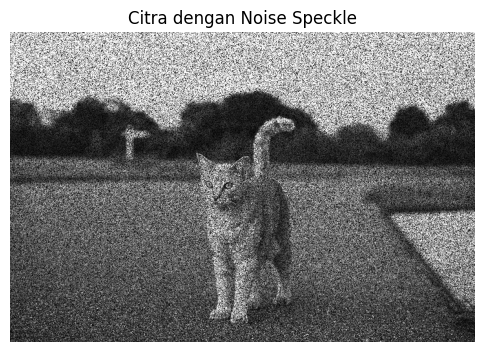

In [7]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Membuat noise Speckle
speckle = np.random.randn(*img_gray.shape) * 0.5
noise_speckle = img_gray + img_gray * speckle
noise_speckle = np.clip(noise_speckle, 0, 255).astype('uint8')

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(noise_speckle, cmap='gray')
plt.title('Citra dengan Noise Speckle')
plt.axis('off')
plt.show()

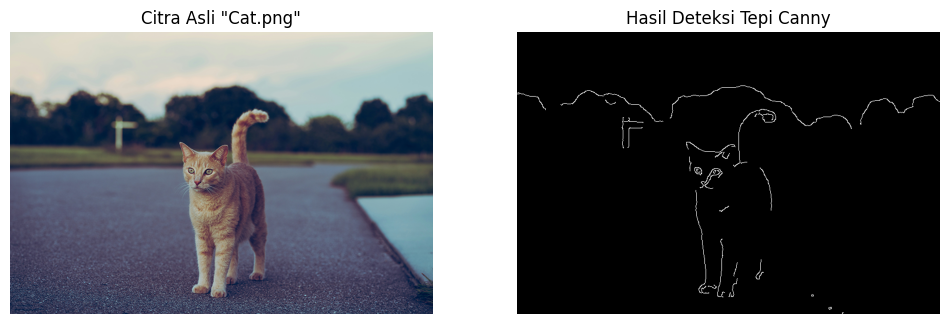

In [10]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Membaca gambar Ucing dan mengubah ke grayscale
try:
    img_parkir = cv2.imread('Cat.png')
    img_parkir_gray = cv2.cvtColor(img_parkir, cv2.COLOR_BGR2GRAY)
except:
    img_parkir = np.zeros((200, 300, 3), dtype=np.uint8)
    img_parkir_gray = np.zeros((200, 300), dtype=np.uint8)
    cv2.putText(img_parkir_gray, 'Gambar tidak ada', (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan Gaussian Blur untuk mereduksi noise
blurred = cv2.GaussianBlur(img_parkir_gray, (5, 5), 0)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan Canny Edge Detection
canny_edges = cv2.Canny(blurred, 100, 200)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil perbandingan
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img_parkir, cv2.COLOR_BGR2RGB) if 'img_parkir' in locals() and img_parkir.shape[2] == 3 else img_parkir_gray, cmap='gray')
axs[0].set_title('Citra Asli "Cat.png"')
axs[0].axis('off')
axs[1].imshow(canny_edges, cmap='gray')
axs[1].set_title('Hasil Deteksi Tepi Canny')
axs[1].axis('off')
plt.show()


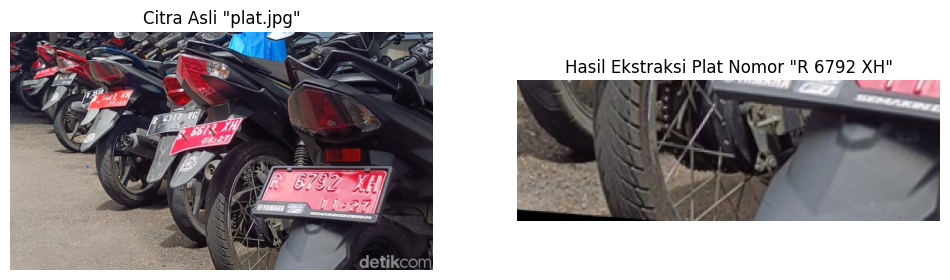

In [11]:
# 2002331207_Rhizieq Reflian Al Farouqh
# Membaca gambar plat nomor
try:
    img_plat = cv2.imread('plat.jpg')
except:
    img_plat = np.zeros((200, 300, 3), dtype=np.uint8)
    cv2.putText(img_plat, 'Gambar tidak ada', (20, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

# 2002331207_Rhizieq Reflian Al Farouqh
# Koordinat 4 titik sudut plat pada gambar asli (diperoleh dari inspeksi manual)
# Urutan: [kiri-atas, kanan-atas, kiri-bawah, kanan-bawah]
pts1 = np.float32([[230, 260], [470, 245], [235, 345], [480, 325]])

# 2002331207_Rhizieq Reflian Al Farouqh
# Menentukan dimensi dan titik sudut untuk citra output
width, height = 300, 100
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# 2002331207_Rhizieq Reflian Al Farouqh
# Mendapatkan matriks transformasi perspektif
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# 2002331207_Rhizieq Reflian Al Farouqh
# Menerapkan transformasi
output_plat = cv2.warpPerspective(img_plat, matrix, (width, height))

# 2002331207_Rhizieq Reflian Al Farouqh
# Menampilkan hasil perbandingan
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(img_plat, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli "plat.jpg"')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(output_plat, cv2.COLOR_BGR2RGB))
axs[1].set_title('Hasil Ekstraksi Plat Nomor "R 6792 XH"')
axs[1].axis('off')
plt.show()